# Analysis of PIV pressor use and possible extravasation
- Ruoyi Jiang
- October 9, 2019
- Pre-liminary

In [34]:
library(tidyverse)
library(fasttime)
library(ggplot2)

### Check terbutaline, phentolamine usage by pharmacy

In [2]:
prescriptions <- read_csv("/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/mimic/PRESCRIPTIONS.csv.gz")

Parsed with column specification:
cols(
  ROW_ID = col_double(),
  SUBJECT_ID = col_double(),
  HADM_ID = col_double(),
  ICUSTAY_ID = col_double(),
  STARTDATE = col_datetime(format = ""),
  ENDDATE = col_datetime(format = ""),
  DRUG_TYPE = col_character(),
  DRUG = col_character(),
  DRUG_NAME_POE = col_character(),
  DRUG_NAME_GENERIC = col_character(),
  FORMULARY_DRUG_CD = col_character(),
  GSN = col_character(),
  NDC = col_character(),
  PROD_STRENGTH = col_character(),
  DOSE_VAL_RX = col_character(),
  DOSE_UNIT_RX = col_character(),
  FORM_VAL_DISP = col_character(),
  FORM_UNIT_DISP = col_character(),
  ROUTE = col_character()
)


In [6]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Phentolamine Mesylate") %>% head()

ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2193190,608,171266,NA,2167-03-09,2167-03-10,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,54569470200,5MG VIAL,5,mg,1,VIAL,IV
2193189,608,171266,NA,2167-03-09,2167-03-10,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,54569470200,5MG VIAL,5,mg,1,VIAL,ID
2666873,1849,114623,274141,2171-06-04,2171-06-04,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,5,mg,1,VIAL,SC
2666874,1849,114623,274141,2171-06-04,2171-06-05,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,5,mg,1,VIAL,SC
1446361,1931,109646,NA,2179-08-07,2179-08-08,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5MG VIAL,5,mg,1,VIAL,IV
2848413,4331,120294,265287,2142-11-02,2142-11-03,MAIN,Phentolamine Mesylate,Phentolamine Mesylate,Phentolamine Mesylate,PHEN5I,005112,55390011301,5 mg Vial,10,mg,2,VIAL,SC


In [30]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Phentolamine Mesylate") %>% dim()

[1] 49 19

In [4]:
prescriptions %>% filter(DRUG_NAME_GENERIC == "Terbutaline Sulfate") %>% dim()

[1]  6 19

In [5]:
prescriptions %>% filter(grepl("Nitroglycerin", DRUG_NAME_GENERIC)) %>% dim()

[1] 5253   19

### Extract nitroglycerin events from CHARTEVENTS

In [ ]:
# find extract nitro events in CHARTEVENTS (need to use pressors sql script)
#https://physionet.org/files/mimiciii-demo/1.4/d_items.csv

In [7]:
nitroglycerin_df = read.csv('/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/out/nitroglycerin.csv')

In [8]:
nitroglycerin_df %>% head()

X,index,icustay_id,vasonum,starttime,endtime,duration_hours
<int>,<int>,<dbl>,<int>,<fct>,<fct>,<dbl>
0,0,200007,1,2109-02-17 11:00:00,2109-02-18 09:15:00,22.250000
1,1,200063,1,2141-03-10 07:10:00,2141-03-10 13:06:00,5.933333
2,2,200063,2,2141-03-10 13:06:00,2141-03-10 14:34:00,1.466667
3,3,200063,3,2141-03-10 14:34:00,2141-03-10 21:36:00,7.033333
4,4,200063,4,2141-03-10 21:36:00,2141-03-11 02:04:00,4.466667
5,5,200063,5,2141-03-11 02:04:00,2141-03-11 06:23:00,4.316667


### Look for number of pressor courses prior to CVC introduction

If you want to get a 30-minute survey of the extravasation question, you can create a filter of vasopressors without a central line at the same time. This can give us our n for how many times vasopressors were used without a CVC and some summary statistics about how long it took until a CVC was placed. Then we can look for med administrations of terbutaline/phentolamine/nitro ointments also in those time windows. No rush whatsoever. No one else will think of this question. It could provide the inspiration to do a similar retrospective study at Yale, which will have integrated ED, ICU, and floor data.

In [10]:
pressors_df <- read.csv('~/Projects/Haimovich_Pressors/collection/out/pressors.csv')

In [13]:
pressors_df %>%
    group_by(pressor) %>%
    summarize(COUNT = n())

pressor,COUNT
<fct>,<int>
adenosinedurations,160
arterial_line_durations,30424
central_line_durations,38211
crrtdurations,5918
dobutaminedurations,1792
dopaminedurations,6524
epinephrinedurations,3126
isupreldurations,24
milrinonedurations,3600


In [17]:
# extract out earliest cvc starttimes per ICU visit
cvc_df <- pressors_df %>%
    filter(pressor == "central_line_durations") %>% 
    select(starttime, icustay_id) %>% 
    group_by(icustay_id) %>% filter(min(fastPOSIXct(starttime))==fastPOSIXct(starttime))

In [19]:
# extract out vasopressor duration endtimes
pressorend_df <- pressors_df %>%
    filter(pressor == "vasopressordurations") %>% 
    select(endtime, icustay_id)

In [21]:
# how many vasopressor courses were there?
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    dim()

[1] 39391     3

In [31]:
# find vasopressor courses where the cvc starttime came after the pressor endtime
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    filter(fastPOSIXct(starttime) > fastPOSIXct(endtime)) %>%
    dim()

[1] 4235    3

Warning message:
“Grouping rowwise data frame strips rowwise nature”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 144 rows containing non-finite values (stat_bin).”Warning message:
“Removed 144 rows containing non-finite values (stat_density).”Warning message:
“Removed 2 rows containing missing values (geom_bar).”

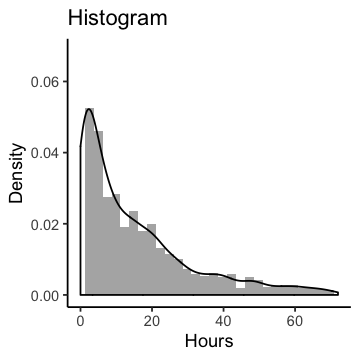

In [36]:
options(repr.plot.width=3, repr.plot.height=3)

# plot duration between last pressor course ended and CVC was started
pressorend_df %>%
    left_join(cvc_df, by='icustay_id') %>% 
    filter(fastPOSIXct(starttime) > fastPOSIXct(endtime)) %>%
    rowwise() %>% 
    mutate(DIFF = difftime(fastPOSIXct(starttime), fastPOSIXct(endtime), units="hours")) %>%
    group_by(icustay_id) %>%
    filter(DIFF == min(DIFF)) %>%
    ggplot(aes(x=DIFF)) +
        geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
        geom_density(alpha=0.6)+
        xlim(0, 72) +
        scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
        labs(title="Histogram",x="Hours", y = "Density")+
        theme_classic()

### Check the eICU database for the formatting of chartevents

In [40]:
EICU_DIR <- "/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/eicu_demo/alpha.physionet.org/files/eicu-crd-demo/2.0"

In [41]:
eicu_medications <- read_csv(file.path(EICU_DIR, "medication.csv.gz"))

Parsed with column specification:
cols(
  medicationid = col_double(),
  patientunitstayid = col_double(),
  drugorderoffset = col_double(),
  drugstartoffset = col_double(),
  drugivadmixture = col_character(),
  drugordercancelled = col_character(),
  drugname = col_character(),
  drughiclseqno = col_double(),
  dosage = col_character(),
  routeadmin = col_character(),
  frequency = col_character(),
  loadingdose = col_logical(),
  prn = col_character(),
  drugstopoffset = col_double(),
  gtc = col_double()
)
Warning message:
“8 parsing failures.
  row         col           expected actual                                                                                                                               file
18162 loadingdose 1/0/T/F/TRUE/FALSE 0 mg   '/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/eicu_demo/alpha.physionet.org/files/eicu-crd-demo/2.0/medication.csv.gz'
18463 loadingdose 1/0/T/F/TRUE/FALSE 0 mg   '/Users/ruoyijiang/Projects/Haimovich_Pressors/coll

In [42]:
head(eicu_medications)

medicationid,patientunitstayid,drugorderoffset,drugstartoffset,drugivadmixture,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>
7278819,141765,134,1396,No,No,WARFARIN SODIUM 5 MG PO TABS,2812,5 3,PO,NA,NA,No,2739,0
9726266,141765,1,-188,No,No,5 ML VIAL : DILTIAZEM HCL 25 MG/5ML IV SOLN,182,15 3,IV,Once PRN,NA,Yes,171,38
10293599,141765,115,856,No,No,ASPIRIN EC 81 MG PO TBEC,1820,81 3,PO,Daily,NA,No,2739,0
10871534,141765,114,316,No,No,DILTIAZEM HCL 30 MG PO TABS,182,30 3,PO,Q6H SCH,NA,No,2739,0
10128716,141765,115,856,No,No,LISINOPRIL 5 MG PO TABS,132,5 3,PO,Daily,NA,No,2428,0
8580224,143870,17,1033,No,No,ASPIRIN EC 81 MG PO TBEC,1820,81 3,PO,Daily,NA,No,1339,0


In [48]:
unique(eicu_medications$drugname)

[1] "WARFARIN SODIUM 5 MG PO TABS"                                                
   [2] "5 ML VIAL : DILTIAZEM HCL 25 MG/5ML IV SOLN"                                 
   [3] "ASPIRIN EC 81 MG PO TBEC"                                                    
   [4] "DILTIAZEM HCL 30 MG PO TABS"                                                 
   [5] "LISINOPRIL 5 MG PO TABS"                                                     
   [6] "1 ML  -  DIPHENHYDRAMINE HCL 50 MG/ML IJ SOLN"                               
   [7] "METOPROLOL TARTRATE 25 MG PO TABS"                                           
   [8] "CLOPIDOGREL BISULFATE 75 MG PO TABS"                                         
   [9] NA                                                                            
  [10] "2 ML  -  METOCLOPRAMIDE HCL 5 MG/ML IJ SOLN"                                 
  [11] "2 ML VIAL : ONDANSETRON HCL 4 MG/2ML IJ SOLN"                                
  [12] "1 ML  -  HYDROMORPHONE HCL 1 MG/ML IJ SOLN"                                  
  [13] "ENOXAPARIN SODIUM 40 MG/0.4ML SC SOLN"                                       
  [14] "ASPIRIN 325 MG PO TABS"                                                      
  [15] "HYDROCODONE-ACETAMINOPHEN 10-325 MG PO TABS"                                 
  [16] "ACETAMINOPHEN 500 MG PO TABS"                                                
  [17] "3 ML VIAL : INSULIN REGULAR HUMAN 100 UNIT/ML IJ SOLN"                       
  [18] "VITAMINS/MINERALS PO TABS"                                                   
  [19] "PANTOPRAZOLE SODIUM 40 MG PO TBEC"                                           
  [20] "100 ML  -  MAGNESIUM SULFATE IN D5W 10-5 MG/ML-% IV SOLN"                    
  [21] "SPIRONOLACTONE 25 MG PO TABS"                                                
  [22] "MAGNESIUM SULFATE 2 G IN NS PREMIX"                                          
  [23] "100 ML  -  METRONIDAZOLE IN NACL 5-0.79 MG/ML-% IV SOLN"                     
  [24] "BISACODYL 10 MG RE SUPP"                                                     
  [25] "SENNOSIDES-DOCUSATE SODIUM 8.6-50 MG PO TABS"                                
  [26] "50 ML FLEX CONT : MAGNESIUM SULFATE 4% IJ SOLN"                              
  [27] "MORPHINE INJ"                                                                
  [28] "1 ML  -  LORAZEPAM 2 MG/ML IJ SOLN"                                          
  [29] "VANCOMYCIN 1.25 GM IN NS 250 ML IVPB (REPACKAGE)"                            
  [30] "3 ML VIAL : INSULIN LISPRO (HUMAN) 100 UNIT/ML SC SOLN"                      
  [31] "3 ML  -  IPRATROPIUM-ALBUTEROL 0.5-2.5 (3) MG/3ML IN SOLN"                   
  [32] "3.5 G  -  REFRESH P.M. OP OINT"                                              
  [33] "METHYLPREDNISOLONE SODIUM SUCC 125 MG IJ SOLR"                               
  [34] "LEVOFLOXACIN IN D5W 500 MG/100ML IV SOLN"                                    
  [35] "LIDOCAINE 5 % EX PTCH"                                                       
  [36] "KETOROLAC INJ"                                                               
  [37] "DIPHENHYDRAMINE HCL 25 MG PO CAPS"                                           
  [38] "PANTOPRAZOLE SODIUM 40 MG IV SOLR"                                           
  [39] "GUAIFENESIN ER 600 MG PO TB12"                                               
  [40] "1 ML  -  HYDRALAZINE HCL 20 MG/ML IJ SOLN"                                   
  [41] "ALBUTEROL SULFATE (5 MG/ML) 0.5% IN NEBU"                                    
  [42] "GLUCAGON HCL (RDNA) 1 MG IJ SOLR"                                            
  [43] "WARFARIN - PHYSICIAN MONITORED"                                              
  [44] "METOPROLOL SUCCINATE ER 25 MG PO TB24"                                       
  [45] "SERTRALINE HCL 50 MG PO TABS"                                                
  [46] "WARFARIN SODIUM 3 MG PO TABS"                                                
  [47] "ALLOPURINOL 100 MG PO TABS"            

In [43]:
eicu_treatment <- read_csv(file.path(EICU_DIR, "treatment.csv.gz"))

Parsed with column specification:
cols(
  treatmentid = col_double(),
  patientunitstayid = col_double(),
  treatmentoffset = col_double(),
  treatmentstring = col_character(),
  activeupondischarge = col_logical()
)


In [44]:
head(eicu_treatment)

treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
<dbl>,<dbl>,<dbl>,<chr>,<lgl>
9579899,242895,838,cardiovascular|arrhythmias|anticoagulant administration|low molecular weight heparin|enoxaparin,FALSE
8788989,242895,512,cardiovascular|consultations|Cardiology consultation,FALSE
10293108,242895,838,cardiovascular|non-operative procedures|external pacemaker,FALSE
9017080,242895,70,pulmonary|vascular disorders|VTE prophylaxis|low molecular weight heparin|enoxaparin,FALSE
9853526,242895,70,cardiovascular|consultations|Cardiology consultation,FALSE
10361067,242895,1434,pulmonary|medications|bronchodilator|inhaled,TRUE


In [45]:
eicu_infusion <- read_csv(file.path(EICU_DIR, "infusiondrug.csv.gz"))

Parsed with column specification:
cols(
  infusiondrugid = col_double(),
  patientunitstayid = col_double(),
  infusionoffset = col_double(),
  drugname = col_character(),
  drugrate = col_double(),
  infusionrate = col_double(),
  drugamount = col_double(),
  volumeoffluid = col_double(),
  patientweight = col_double()
)
Warning message:
“18 parsing failures.
  row      col expected actual                                                                                                                                 file
16905 drugrate a double  ERROR '/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/eicu_demo/alpha.physionet.org/files/eicu-crd-demo/2.0/infusiondrug.csv.gz'
28826 drugrate a double  ERROR '/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/eicu_demo/alpha.physionet.org/files/eicu-crd-demo/2.0/infusiondrug.csv.gz'
28831 drugrate a double  ERROR '/Users/ruoyijiang/Projects/Haimovich_Pressors/collection/eicu_demo/alpha.physionet.org/files/eicu-crd-demo/2.0/in

In [46]:
head(eicu_infusion)

infusiondrugid,patientunitstayid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight
<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40215081,1461035,768,Volume (mL) Magnesium (ml/hr),25.00,NA,NA,NA,NA
38752780,1461035,648,Volume (mL) Magnesium (ml/hr),25.00,NA,NA,NA,NA
36960718,1461035,-1812,Volume (mL) Magnesium (ml/hr),25.00,NA,NA,NA,NA
38679313,1461035,-611,Volume (mL) Magnesium (ml/hr),25.42,NA,NA,NA,NA
40681648,1461035,828,Volume (mL) Magnesium (ml/hr),25.00,NA,NA,NA,NA
37790467,1461035,1068,Volume (mL) Magnesium (ml/hr),25.00,NA,NA,NA,NA


In [47]:
unique(eicu_infusion$drugname)

[1] "Volume (mL) Magnesium  (ml/hr)"                                                            
  [2] "Amiodarone (mg/min)"                                                                       
  [3] "MIV (ml/hr)"                                                                               
  [4] "Octreotide (ml/hr)"                                                                        
  [5] "Nitroglycerin (mcg/min)"                                                                   
  [6] "Nicardipine (mg/hr)"                                                                       
  [7] "Labetalol (ml/hr)"                                                                         
  [8] "Norepinephrine (mcg/min)"                                                                  
  [9] "Phenylephrine (mcg/min)"                                                                   
 [10] "Phenylephrine (mcg/kg/min)"                                                                
 [11] "Dexmedetomidine (mcg/kg/hr)"                                                               
 [12] "Nitroprusside (mcg/kg/min)"                                                                
 [13] "Fentanyl (mcg/hr)"                                                                         
 [14] "Propofol (mcg/kg/min)"                                                                     
 [15] "Midazolam (mg/hr)"                                                                         
 [16] "Vasopressin (units/min)"                                                                   
 [17] "Insulin (units/hr)"                                                                        
 [18] "Milrinone (mcg/kg/min)"                                                                    
 [19] "Dobutamine (mcg/kg/min)"                                                                   
 [20] "Dopamine (mcg/kg/min)"                                                                     
 [21] "Diltiazem (mg/hr)"                                                                         
 [22] "Diltiazem (ml/hr)"                                                                         
 [23] "IVF (ml/hr)"                                                                               
 [24] "Abciximab (mcg/min)"                                                                       
 [25] "Dopamine ()"                                                                               
 [26] "Pantoprazole ()"                                                                           
 [27] "Propofol ()"                                                                               
 [28] "Nicardipine (ml/hr)"                                                                       
 [29] "Furosemide (mg/hr)"                                                                        
 [30] "Heparin (units/hr)"                                                                        
 [31] "Dexmedetomidine"                                                                           
 [32] "Fentanyl (ml/hr)"                                                                          
 [33] "Propofol (ml/hr)"                                                                          
 [34] "Amiodarone (ml/hr)"                                                                        
 [35] "Dexmedetomidine (ml/hr)"                                                                   
 [36] "Heparin (ml/hr)"                                                                           
 [37] "Nitroprusside (ml/hr)"                                                                     
 [38] "Pantoprazole (ml/hr)"                                                                      
 [39] "Norepinephrine (ml/hr)"                                                                    
 [40] "Phenylephrine (ml/hr)"                                                                     
 [41] "Midazolam (ml/hr)"                 